# Objective

We will look into `Univariate Analysis` at first to explore the Distribution, Summary Stats, Trends of one variable at a time of each variable

## 1. Read Dataset from `Gapminder`

From the doc, `Gapminder` captures global changes from 1952 to 2007. It more insightful to examine how these vairables evolve over time.

In [86]:
from gapminder import gapminder

In [87]:
df = gapminder.copy()
df.shape

(1704, 6)

In [88]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## 2. Type of Variable

``Qualitative Data`` descibes categories or characterstics, while ``Quantiavtive Data`` represents numerical measurements.
- Qualitative answer "What", "Which"... to explain non-numerical, descriptive, categorical from the insight of data and use graph to see the categorical
- Quantivative answer "How many", "How much", "How often"... to explain the numerical, measurable, countable by methods like calculating means, medians, standard deviation, using graph to see the trend

In [89]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

→→↪⇒⇨⇛▶

> Quan: Country & Continent, where  
> Qual: Year, LifeExp, Pop, GdpPerCap

### 2.1. Quantitative Variable

In this section, exclude the `year` to obtain an overall summary:  
- Recall the Pearson's second coefficient of `skewness` and `kurtosis`:  
- **Skewness:**  

$Skewness = \frac{3(\text{mean} - \text{median})}{\text{standard deviation}}$  

- **Kurtosis:** Measures the "tailedness" of the distribution, which measures how heavy the tails of the data distribution are compared to a normal distribution. 
> All normal Distributions, the Kurtosis is 3

$\text{Kurt}=n\left(\frac{\sum_{i=1}^n(x_i-\bar{x}_n)^4}{(\sum_{i=1}^n(x_i-\bar{x}_n)^2)^2}\right),$ 

- ``Skewness Quantify`` the asymmetry of the distribution (left-skewed, right-skewed or symetric)
- ``Kurtosis Quantify`` the tailedness (how heavy or light the tails are compared to a normal distribution)

> It helps us numerically summarize the shape of the distribution, beyond just mean and variance.

These 2 matter to next approach?
1. Checking assumptions of statistical models:
- Many models like (Linear Regression, t-tests, ANOVA) assume the residuals are normally distributed
- Skewness ≠ 0 or kurtosis ≠ 3 signals departure from normality, meaning you may need to:  
=> Transform the data (log, square root, Box-Cox)  
=> Use robust stats that don't assume normality  
=> Apply non-parametric tests instead

2. Detecting data issues
- High skewness may suggest: outliers, floor/ceiling effects or an underlying exponential-like process
- High kurtosis (leptokurtic) flags heavy tails -> risk of extreme values
- This informs whether you should clean, winsorize, or treat outliers differently

3. Feature engineering in the ML
- Features with strong skew often benefit from normalization or transormation before being fed into ML (like ``distance-base`` ones with KNN, SVM, clustering ...)
- Kurtosis alerts you to outlier sensitivity that can distrot models like linear regression or PCA

4. Domain consideration
- Useful in finance, economics, epidemiology where fat tails (Kurtosis) or skew (risk asymmetry) matter

> Skewness and Kurtosis are good for guiding `Data Transormation`, `Model Selection`, `Assumption Checking`, `Outlier Treatment` and `Feature Preparation` where visualization gives the picture, but metrics like Skewness and Kurtosis tell us what actions to consider next.

In [90]:
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


#### Calculate by hand

In [91]:
import pandas as pd
import numpy as np
print(pd.DataFrame({
    'Skewness' : df[["lifeExp", "pop", "gdpPercap"]].apply(lambda x: 3*(np.mean(x)-x.median())/np.std(x)),
    'Kurtosis' : df[["lifeExp", "pop", "gdpPercap"]].apply(lambda x: len(x)*(np.sum((x-np.mean(x)) ** 4)/(np.sum((x-np.mean(x)) ** 2) ** 2)) - 3)   
}, index=["lifeExp", "pop", "gdpPercap"]).transpose())

           lifeExp        pop  gdpPercap
Skewness -0.287624   0.638226   1.121353
Kurtosis -1.126901  77.716151  27.431702


#### Calculate by `scipy.stats`

In [92]:
from scipy.stats import skew, kurtosis

print(pd.DataFrame({
    'Skewness': df[["lifeExp", "pop", "gdpPercap"]].apply(lambda x: skew(x)),
    'Kurtosis': df[["lifeExp", "pop", "gdpPercap"]].apply(lambda x: kurtosis(x, fisher=False))
}, index=["lifeExp", "pop", "gdpPercap"]).transpose())

           lifeExp        pop  gdpPercap
Skewness -0.252480   8.332874   3.846882
Kurtosis  1.873099  80.716151  30.431702


1. lifeExp (Life Expectancy)
- Skewness = -0.25 → Slightly left-skewed (longer tail to the left), but close to 0 → distribution is almost symmetric.
- Kurtosis = 1.87 (< 3) → Platykurtic → thinner tails & flatter peak than normal.
> Life Expectancy is fairly symmetric, with less extreme outliers than a normal distribution

2. pop (Population)
- Skewness = 8.33 → Extremely right-skewed → most countries have small populations, but a few (China, India, etc.) dominate the distribution.
- Kurtosis = 80.72 → Extremely leptokurtic → very heavy tails → massive outlier effect.
> Population distribution is highly imbalanced; a few very large countries distort the scale. Log transformation is usually needed before modeling.

3. gdpPercap (GDP per capita)
- Skewness = 3.85 → Strong right skew → most countries are clustered at lower GDP per capita, with a few very wealthy countries stretching the distribution.
- Kurtosis = 30.43 → Very leptokurtic → heavy tails and extreme values present.
> Similar to population, GDP per capita is dominated by a small number of outliers (e.g., Luxembourg, Qatar). Log transformation is also useful here.


-> lifeExp → already well-behaved, near-symmetric → usable as is.  
-> pop & gdpPercap → highly skewed and heavy-tailed → need log transformation (or other scaling) before statistical tests or ML models.

#### Some visualization

To describe the Distribution of quantiative variable, suitable graphs are `Boxplot`, `Violinplot`, `Desity` or `Histogram`

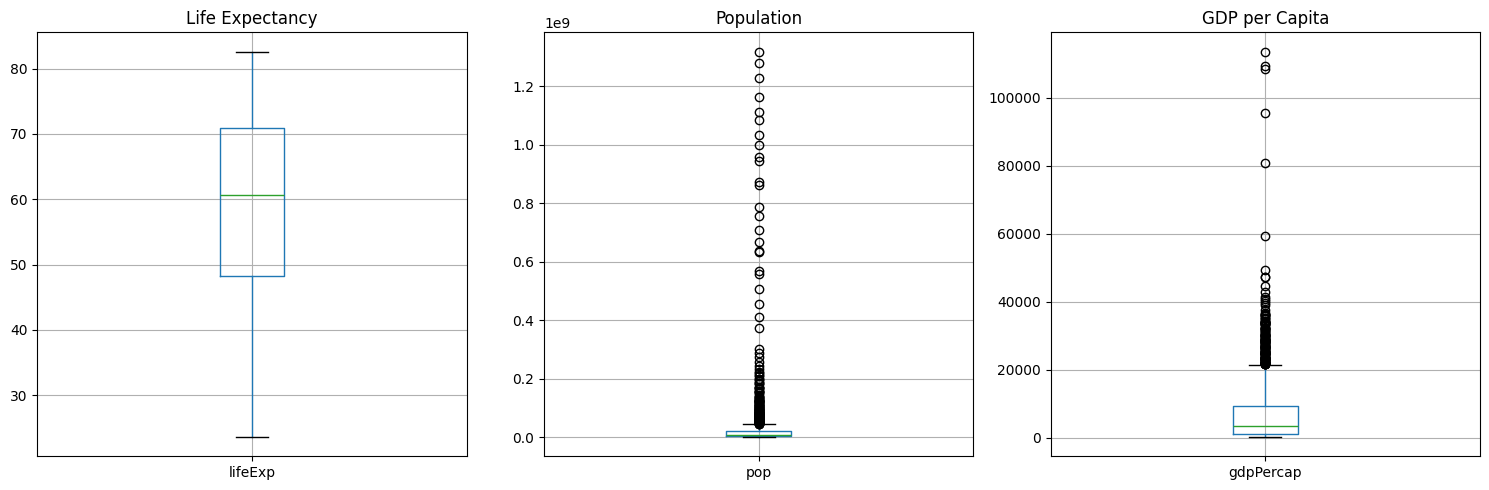

In [93]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
df.boxplot(column='lifeExp', ax=axes[0])
axes[0].set_title('Life Expectancy')
df.boxplot(column='pop', ax=axes[1])
axes[1].set_title('Population')
df.boxplot(column='gdpPercap', ax=axes[2])
axes[2].set_title('GDP per Capita')
plt.tight_layout()
plt.show()

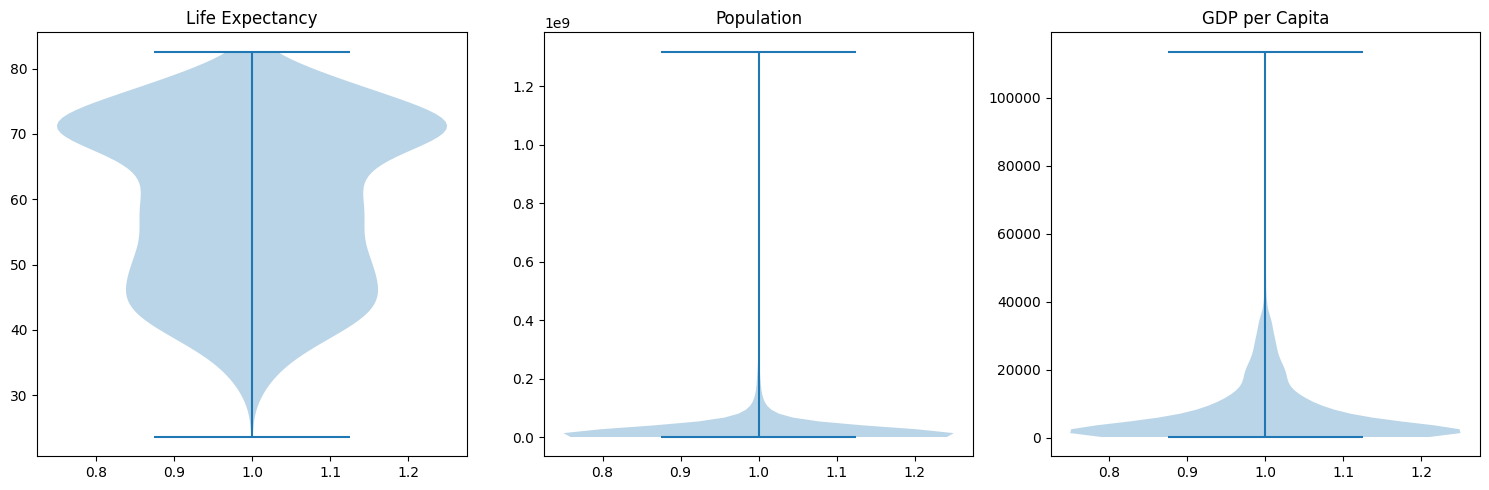

In [94]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].violinplot(df['lifeExp'])
axes[0].set_title('Life Expectancy')
axes[1].violinplot(df['pop'])
axes[1].set_title('Population')
axes[2].violinplot(df['gdpPercap'])
axes[2].set_title('GDP per Capita')
plt.tight_layout()
plt.show()

##### Which year is the most matter to explore?

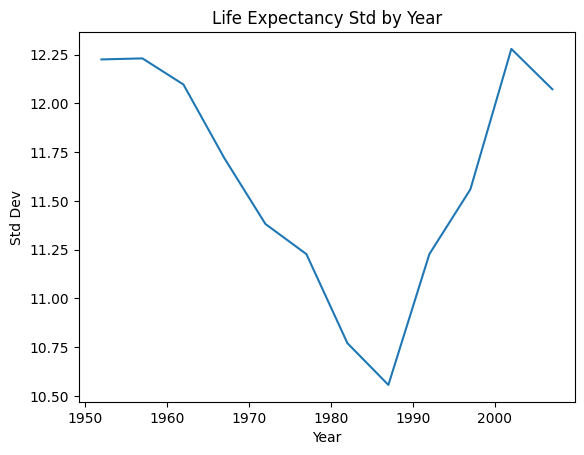

Year with highest life expectancy variance: 2002


In [95]:
# Find the year(s) with the highest variance in quantitative variables (lifeExp, pop, gdpPercap)
year_stats = df.groupby('year')[['lifeExp', 'pop', 'gdpPercap']].agg(['mean', 'std'])
year_stats['lifeExp', 'std'].plot(title='Life Expectancy Std by Year')
plt.xlabel('Year')
plt.ylabel('Std Dev')
plt.show()

# To detect the "most matter" year, look for years with highest std deviation or outliers
most_var_year = year_stats['lifeExp', 'std'].idxmax()
print(f"Year with highest life expectancy variance: {most_var_year}")

In [96]:
# To detect the "most matter" year, look for years with highest std deviation or outliers
least_var_year = year_stats['lifeExp', 'std'].idxmin()
print(f"Year with lowest life expectancy variance: {least_var_year}")

Year with lowest life expectancy variance: 1987


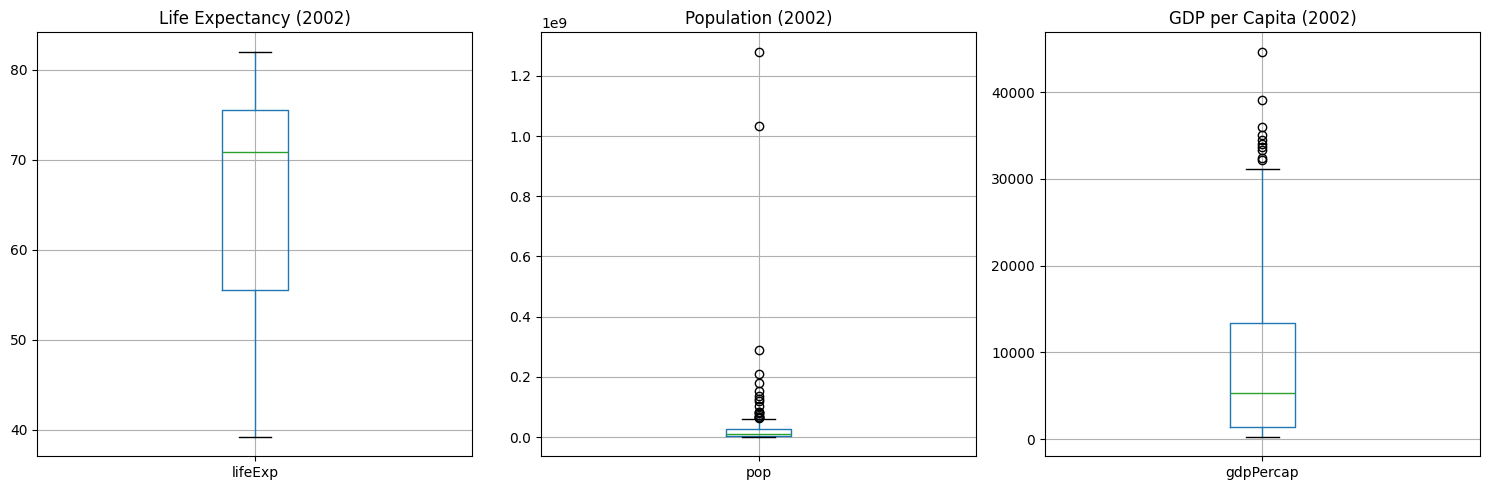

In [97]:
df_2002 = df[df['year'] == 2002]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
df_2002.boxplot(column='lifeExp', ax=axes[0])
axes[0].set_title('Life Expectancy (2002)')
df_2002.boxplot(column='pop', ax=axes[1])
axes[1].set_title('Population (2002)')
df_2002.boxplot(column='gdpPercap', ax=axes[2])
axes[2].set_title('GDP per Capita (2002)')
plt.tight_layout()
plt.show()

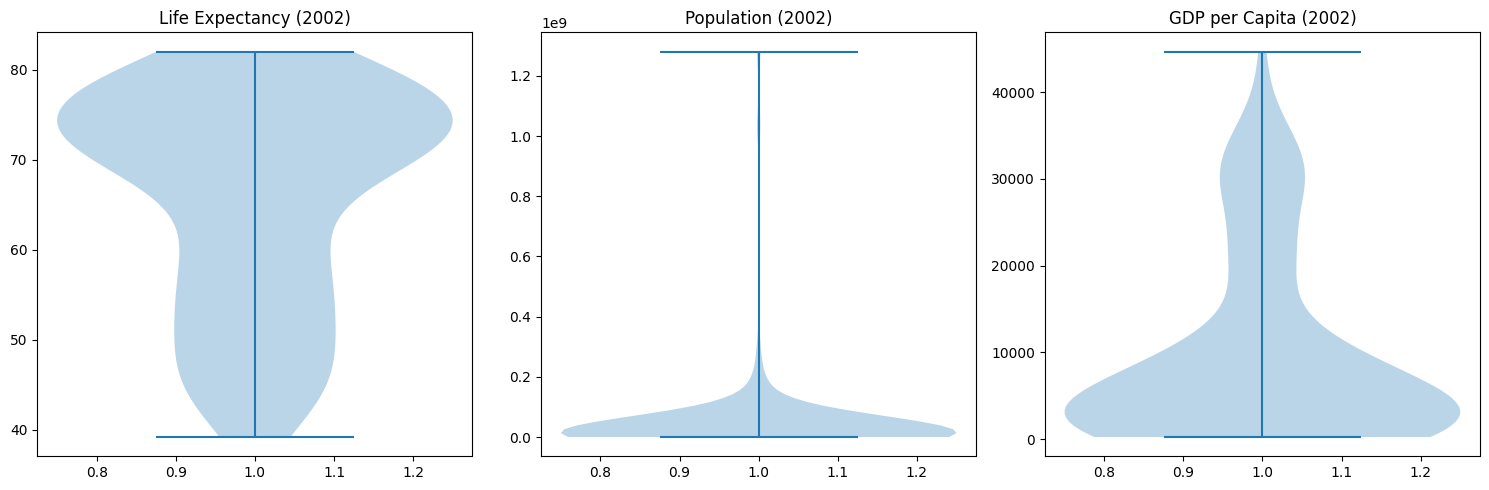

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].violinplot(df_2002['lifeExp'])
axes[0].set_title('Life Expectancy (2002)')
axes[1].violinplot(df_2002['pop'])
axes[1].set_title('Population (2002)')
axes[2].violinplot(df_2002['gdpPercap'])
axes[2].set_title('GDP per Capita (2002)')
plt.tight_layout()
plt.show()

##### Density without scaling

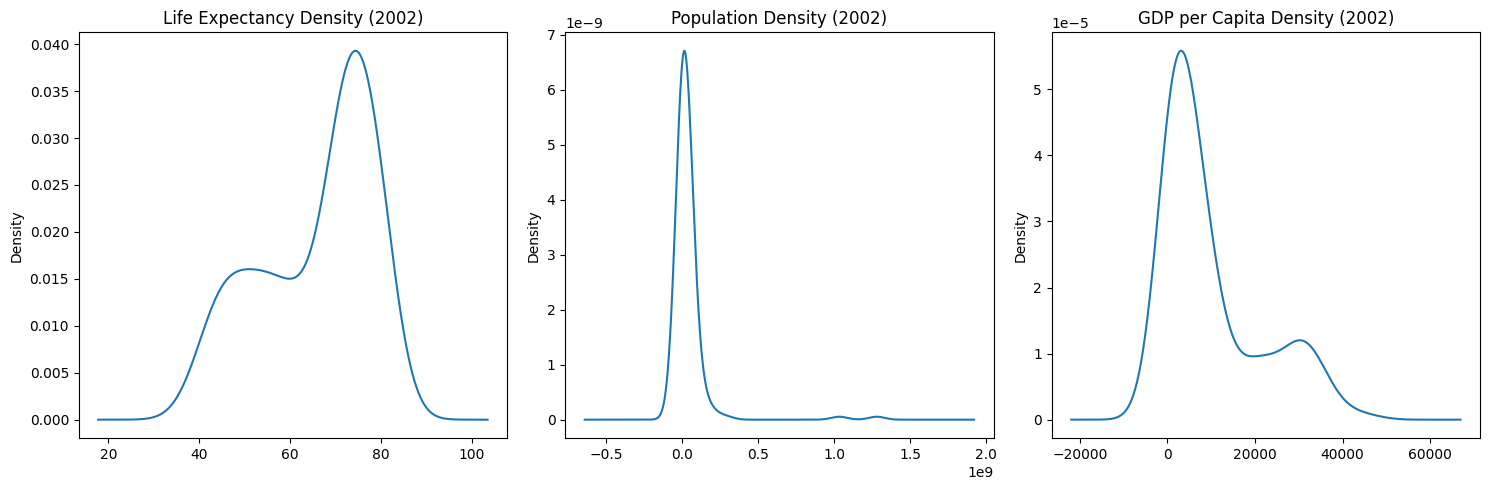

In [99]:
# Density plots for lifeExp, pop, gdpPercap in 2002
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
df_2002['lifeExp'].plot(kind='density', ax=axes[0])
axes[0].set_title('Life Expectancy Density (2002)')
df_2002['pop'].plot(kind='density', ax=axes[1])
axes[1].set_title('Population Density (2002)')
df_2002['gdpPercap'].plot(kind='density', ax=axes[2])
axes[2].set_title('GDP per Capita Density (2002)')
plt.tight_layout()
plt.show()

##### Density with `log` scaling

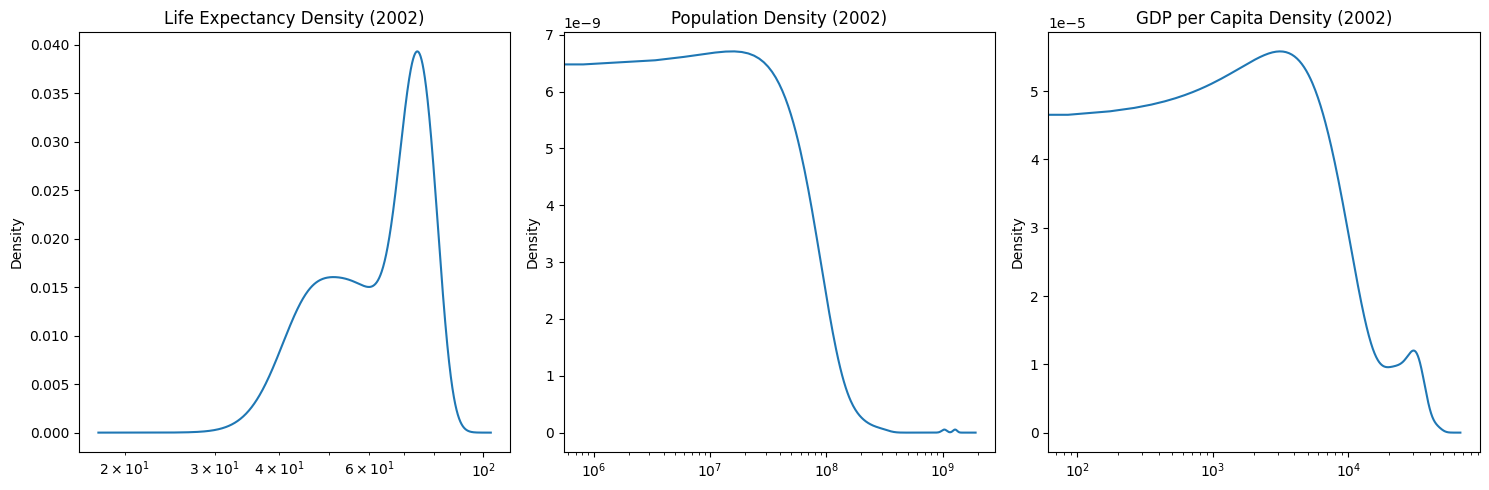

In [100]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
df_2002['lifeExp'].plot(kind='density', ax=axes[0])
axes[0].set_title('Life Expectancy Density (2002)')
axes[0].set_xscale('log')
df_2002['pop'].plot(kind='density', ax=axes[1])
axes[1].set_title('Population Density (2002)')
axes[1].set_xscale('log')
df_2002['gdpPercap'].plot(kind='density', ax=axes[2])
axes[2].set_title('GDP per Capita Density (2002)')
axes[2].set_xscale('log')
plt.tight_layout()
plt.show()

With this dataset in 2002:
- GPD show how rich (max value) or poor (min value) of the country 
- Life Expectancy show how healthy (max value) or unhealthy (min value)\

In [101]:
# Find the country with min/max GDP per capita and life expectancy in 2002
min_gdp = df_2002.loc[df_2002['gdpPercap'].idxmin()]
max_gdp = df_2002.loc[df_2002['gdpPercap'].idxmax()]
min_lifeExp = df_2002.loc[df_2002['lifeExp'].idxmin()]
max_lifeExp = df_2002.loc[df_2002['lifeExp'].idxmax()]

print("Poorest country in 2002:", min_gdp['country'], "GDP per Capita:", min_gdp['gdpPercap'])
print("Richest country in 2002:", max_gdp['country'], "GDP per Capita:", max_gdp['gdpPercap'])
print("Most unhealthy country in 2002:", min_lifeExp['country'], "Life Expectancy:", min_lifeExp['lifeExp'])
print("Most healthy country in 2002:", max_lifeExp['country'], "Life Expectancy:", max_lifeExp['lifeExp'])

Poorest country in 2002: Congo, Dem. Rep. GDP per Capita: 241.1658765
Richest country in 2002: Norway GDP per Capita: 44683.97525
Most unhealthy country in 2002: Zambia Life Expectancy: 39.193
Most healthy country in 2002: Japan Life Expectancy: 82.0


another year to explore is 1987 :D

This dataset, the existing qualitative variables are not suitable for analysis because they are repeated each year. Therefore, we will create three new qualitative variables associated with the three quantitative ones by dividing them into three categories each.  
The 3 variable into 3 groups:
- `gdpQual`: developing, moderate, developed
- `popQual`: small, medium, large
- `lifeExpQual`: unhealthy, moderate, healthy  

Example:
- ``pd.cut()``
```python
data = pd.Series([1, 2, 3, 10, 20, 30, 100])

# Equal-width bins (3 bins)
pd.cut(data, bins=3)

# Output
# [1–34], [34–67], [67–100]
# Most values fall in [1–34], almost nothing in the middle bin.
```
- ``pd.qcut()``
```python
# Quantile bins (3 bins, tertiles)
pd.qcut(data, q=3)

# Output
# Bin1 (lowest 1/3): [1, 2, 3]
# Bin2 (middle 1/3): [10, 20]
# Bin3 (highest 1/3): [30, 100]
```

In [102]:
# Create qualitative variables using pd.cut and pd.qcut
df['lifeExpQual'] = pd.cut(df['lifeExp'], bins=3, labels=['unhealthy', 'moderate', 'healthy'])
df['popQual'] = pd.cut(df['pop'], bins=3, labels=['small', 'medium', 'large'])
df['gdpQual'] = pd.cut(df['gdpPercap'], bins=3, labels=['developing', 'moderate', 'developed'])

In [103]:
print(df['lifeExpQual'].value_counts())
print('\n')
print(df['popQual'].value_counts())
print('\n')
print(df['gdpQual'].value_counts())

lifeExpQual
healthy      785
moderate     685
unhealthy    234
Name: count, dtype: int64


popQual
small     1682
medium      12
large       10
Name: count, dtype: int64


gdpQual
developing    1688
moderate        11
developed        5
Name: count, dtype: int64


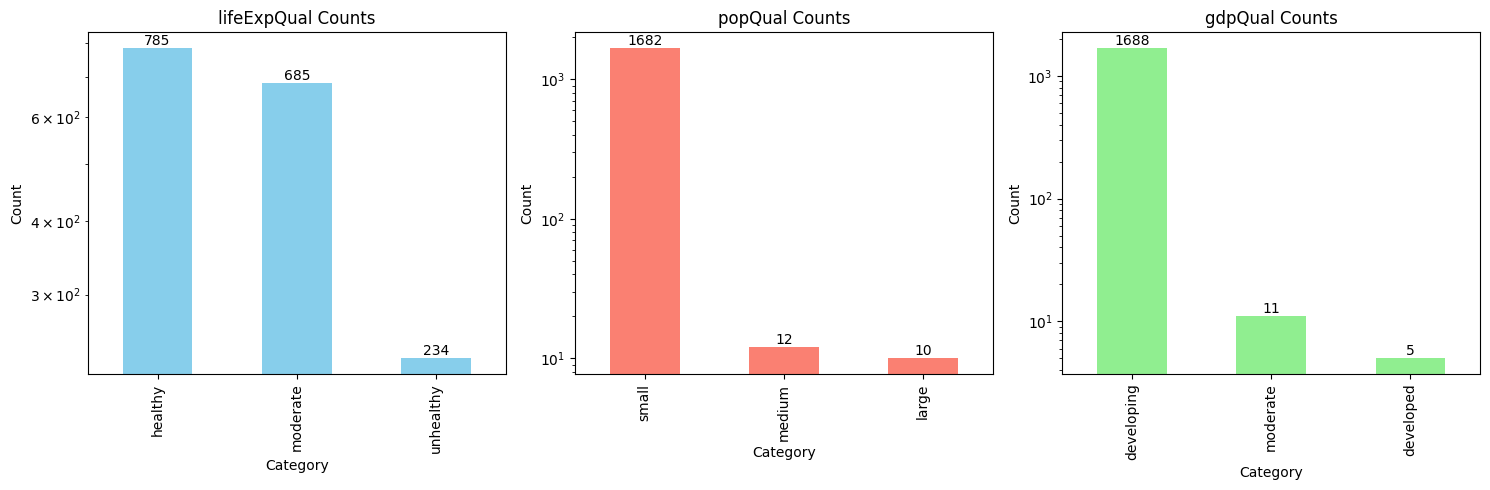

In [104]:
# Barplot for the counts of each qualitative variable with log scale on y-axis and count labels
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (col, color) in enumerate(zip(['lifeExpQual', 'popQual', 'gdpQual'], ['skyblue', 'salmon', 'lightgreen'])):
    counts = df[col].value_counts()
    bars = counts.plot(kind='bar', ax=axes[idx], color=color)
    axes[idx].set_title(f'{col} Counts')
    axes[idx].set_xlabel('Category')
    axes[idx].set_ylabel('Count')
    axes[idx].set_yscale('log')
    for p in bars.patches:
        axes[idx].annotate(f'{int(p.get_height())}', 
                           (p.get_x() + p.get_width() / 2, p.get_height()), 
                           ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


Recall back to see the intepretation of ``Skewness`` and ``Kurtosis`` :D

### 2.2. Qualitative Varaible

In [105]:
df.describe(include='object')

,country,continent
count,1704,1704
unique,142,5
top,Afghanistan,Africa
freq,12,624


In [106]:
df['continent'].value_counts()

continent
Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: count, dtype: int64

### 2.3. Time Evolution

To consider how each variable of dataset `Gapminder` perform change from year to year between the 1952 to 2007.

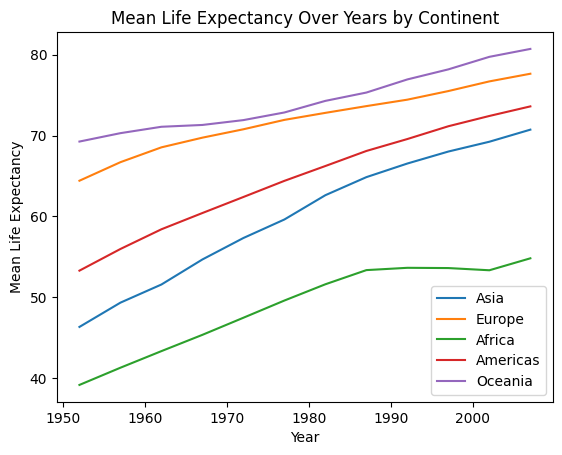

In [107]:
# Line plot: mean life expectancy over years for each continent
for continent in df['continent'].unique():
    subset = df[df['continent'] == continent]
    mean_lifeExp = subset.groupby('year')['lifeExp'].mean()
    plt.plot(mean_lifeExp.index, mean_lifeExp.values, label=continent)

plt.xlabel('Year')
plt.ylabel('Mean Life Expectancy')
plt.title('Mean Life Expectancy Over Years by Continent')
plt.legend()
plt.show()

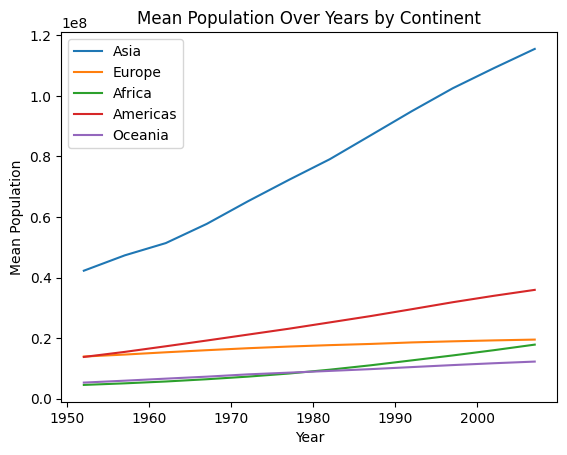

In [108]:
# Line plot: mean population over years for each continent
for continent in df['continent'].unique():
    subset = df[df['continent'] == continent]
    mean_pop = subset.groupby('year')['pop'].mean()
    plt.plot(mean_pop.index, mean_pop.values, label=continent)

plt.xlabel('Year')
plt.ylabel('Mean Population')
plt.title('Mean Population Over Years by Continent')
plt.legend()
plt.show()

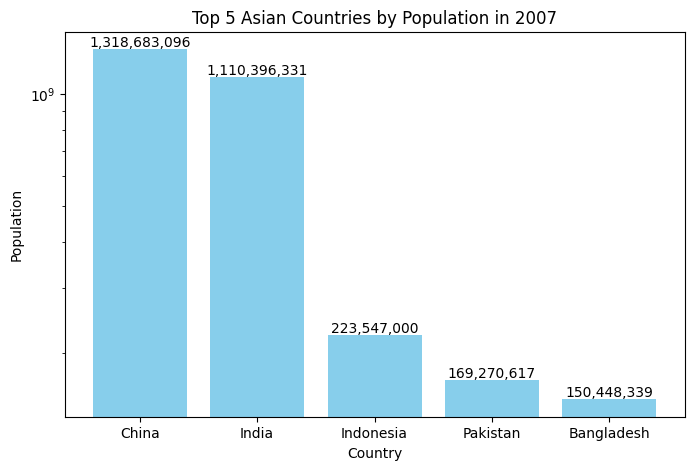

In [109]:
latest_year = df['year'].max()
top_countries = top_asian_pop[top_asian_pop['year'] == latest_year].sort_values('pop', ascending=False).head(5)

plt.figure(figsize=(8, 5))
plt.bar(top_countries['country'], top_countries['pop'], color='skyblue')
plt.title(f'Top 5 Asian Countries by Population in {latest_year}')
plt.xlabel('Country')
plt.ylabel('Population')
plt.yscale('log')
for i, v in enumerate(top_countries['pop']):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=10)
plt.show()

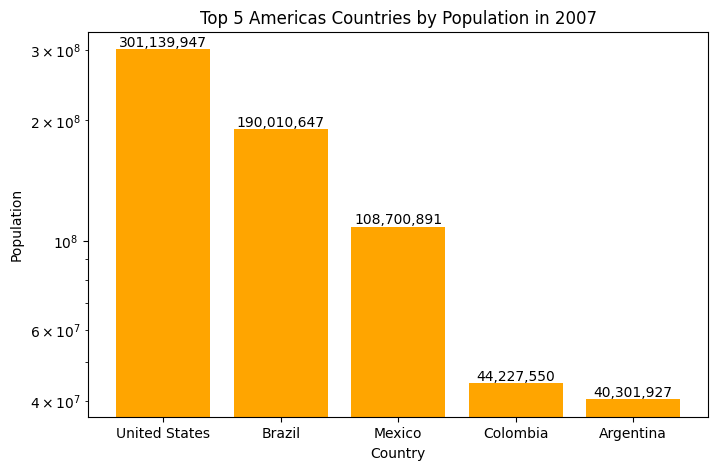

In [110]:
latest_year = df['year'].max()
top_americas_pop = df[(df['continent'] == 'Americas') & (df['year'] == latest_year)][['country', 'pop']]
top_countries = top_americas_pop.sort_values('pop', ascending=False).head(5)

plt.figure(figsize=(8, 5))
plt.bar(top_countries['country'], top_countries['pop'], color='orange')
plt.title(f'Top 5 Americas Countries by Population in {latest_year}')
plt.xlabel('Country')
plt.ylabel('Population')
plt.yscale('log')
for i, v in enumerate(top_countries['pop']):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=10)
plt.show()

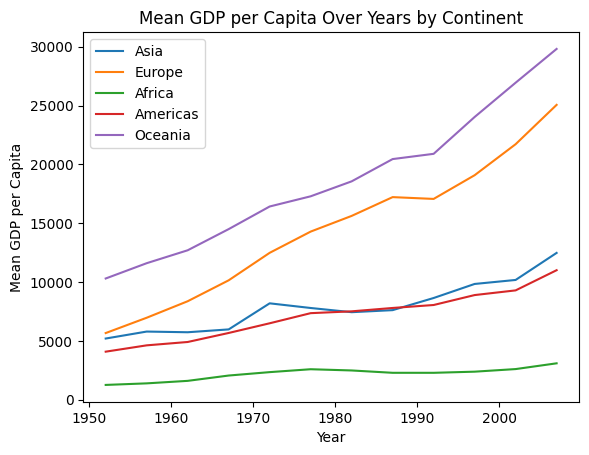

In [113]:
# Line plot: mean GDP per capita over years for each continent
for continent in df['continent'].unique():
    subset = df[df['continent'] == continent]
    mean_gdp = subset.groupby('year')['gdpPercap'].mean()
    plt.plot(mean_gdp.index, mean_gdp.values, label=continent)

plt.xlabel('Year')
plt.ylabel('Mean GDP per Capita')
plt.title('Mean GDP per Capita Over Years by Continent')
plt.legend()
plt.show()

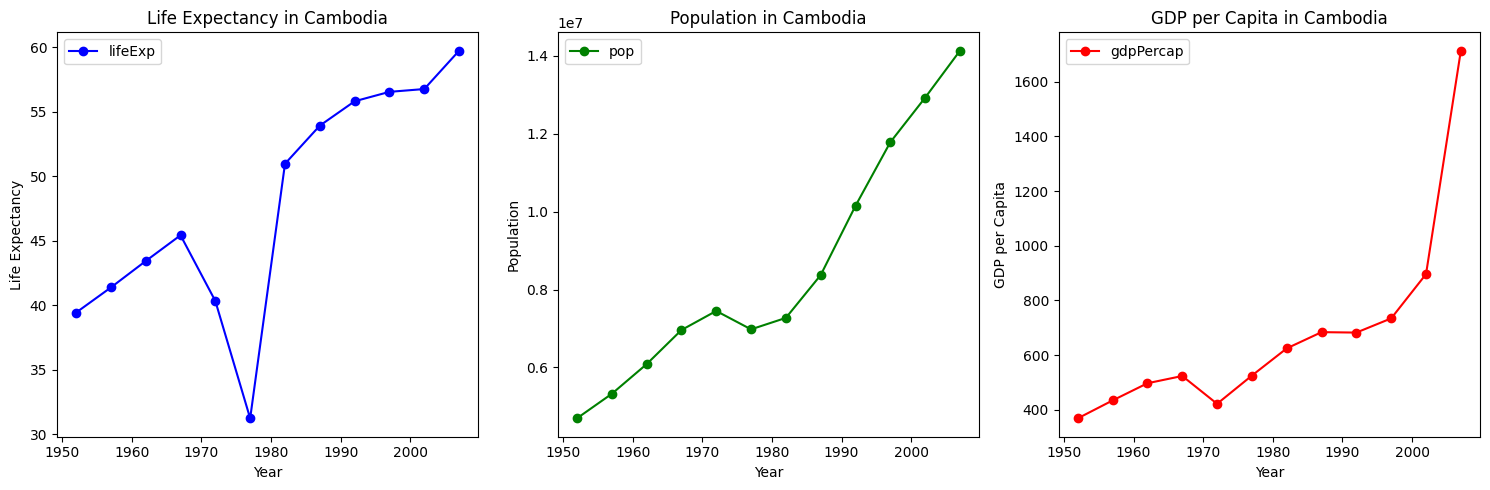

In [112]:
# Plot the evolution of lifeExp, pop, and gdpPercap for Cambodia
cambodia = df[df['country'] == 'Cambodia']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
cambodia.plot(x='year', y='lifeExp', ax=axes[0], marker='o', color='blue')
axes[0].set_title('Life Expectancy in Cambodia')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Life Expectancy')

cambodia.plot(x='year', y='pop', ax=axes[1], marker='o', color='green')
axes[1].set_title('Population in Cambodia')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Population')

cambodia.plot(x='year', y='gdpPercap', ax=axes[2], marker='o', color='red')
axes[2].set_title('GDP per Capita in Cambodia')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('GDP per Capita')

plt.tight_layout()
plt.show()

Khmer Rounge happened during 1970-1975